In [1]:
import py21cmcast as p21c
import numpy as np 

from astropy import units

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

%load_ext autoreload
%autoreload 2

/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/users/g/f/gfacchin/exo21cmFAST_release/exo21cmFAST/src/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
z_bins, k_bins = p21c.define_grid_modes_redshifts(6., 8 * units.MHz, z_max = 22, k_min = 0.1 / units.Mpc, k_max = 1 / units.Mpc)
print("The redshift bin edges are:", z_bins)
print("The mode bin edges are:", k_bins)

fiducial = p21c.Fiducial("/scratch/ulb/physth_fi/gfacchin/runs_21cmCAST/runs/CONSTRAINT_BKR_GAMMA", z_bins, k_bins, False, load=True)
fiducial.observation = 'HERA'


The redshift bin edges are: [ 6.          6.28730456  6.5992025   6.93899281  7.31059216  7.71868653
  8.16892985  8.66820756  9.22499121  9.84982306 10.55599    11.36047883
 12.28536057 13.35984643 14.62342929 16.13084378 17.96020444 20.22698157]
The mode bin edges are: [0.1        0.15329426 0.20658851 0.25988277 0.31317703 0.36647129
 0.41976554 0.4730598  0.52635406 0.57964831 0.63294257 0.68623683
 0.73953109 0.79282534 0.8461196  0.89941386 0.95270811] 1 / Mpc


In [3]:
parameters = ['F_STAR10', 'ALPHA_STAR', 'F_ESC10', 'ALPHA_ESC',  'M_TURN', 't_STAR', 'L_X', 'NU_X_THRESH']
#parameters = ['F_STAR10', 'F_STAR7_MINI', 'ALPHA_STAR', 'ALPHA_STAR_MINI',  't_STAR', 'F_ESC10', 'F_ESC7_MINI', 'ALPHA_ESC', 'L_X', 'L_X_MINI', 'NU_X_THRESH']

params = [None] * len(parameters)

for iname, name in enumerate(parameters) :  
    params[iname] = p21c.Parameter(fiducial=fiducial, name=name, verbose = False, plot = False, load=True)

Treating parameter F_STAR10
Treating parameter ALPHA_STAR
Treating parameter F_ESC10
Treating parameter ALPHA_ESC
Treating parameter M_TURN
Treating parameter t_STAR
Treating parameter L_X
Treating parameter NU_X_THRESH


In [70]:
gamma_arr        = [1e-36, 1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26, 1e-25, 1e-24, 1e-23]
l10_mass_str_arr = ['2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10.0', '10.5', '11.0', '11.5', '12.0']
l10_mass_arr     = [np.float(l10_mass_str) for l10_mass_str in  l10_mass_str_arr]

extra_params = np.full(shape=(len(l10_mass_arr), len(gamma_arr)), fill_value=None)

for im, l10_mass_str in enumerate(l10_mass_str_arr): 
    for ig, gamma in enumerate(gamma_arr):    
        try: 
            extra_params[im, ig] = p21c.Parameter(fiducial=fiducial, name='DM_DECAY_RATE', verbose = False, plot=False, load=True, add_name = 'm' + l10_mass_str, values = gamma)
        except IndexError:
            extra_params[im, ig] = None        

 py21cmcast/1725257151.py:3: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations (DeprecationWarning)


Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.0)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)
Treating parameter DM_DECAY_RATE (m2.5)


In [78]:
fiducial.frac_noise = 0.2

sigma_gamma  = np.zeros(shape=(len(l10_mass_arr), len(gamma_arr)))

for im, l10_mass_str in enumerate(l10_mass_str_arr): 
    for ig, gamma in enumerate(gamma_arr) : 
        if extra_params[im, ig] is not None:
            fisher_matrix     = p21c.evaluate_fisher_matrix([*params, extra_params[im, ig]])
            covariance_matrix = np.linalg.inv(fisher_matrix['matrix'])
            sigma_gamma[im, ig] = np.sqrt(covariance_matrix[-1][-1])

sigma_gamma[sigma_gamma == 0] = np.nan

print(sigma_gamma[-1, :])

[1.25412547e-29 1.12741852e-28 8.01084128e-28 4.95932137e-27
 2.66069328e-26 3.04337255e-26 3.51390874e-26 3.19831194e-26
 3.68150898e-26 3.68273908e-26 3.80795205e-26 5.15006679e-26
            nan 3.34363658e-25]


(1e-30, 1e-24)

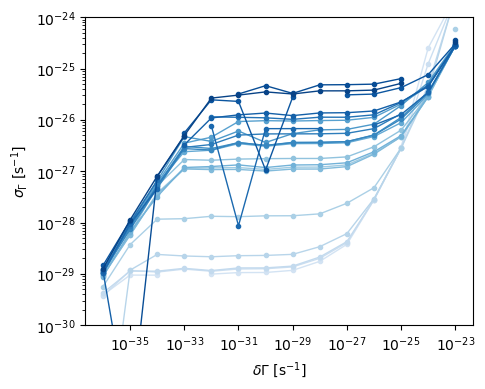

In [84]:
%matplotlib inline

import matplotlib
cmap = matplotlib.cm.get_cmap('Blues')


N = len(l10_mass_str_arr)
color = [cmap((i+5)/(N+6)) for i in range(0, N+1)]

fig, ax = p21c.prepare_plot(ylog=True, xlog=True, xlabel=r'$\delta \Gamma ~ [{\rm s^{-1}}]$', ylabel=r'$\sigma_\Gamma ~ [{\rm s^{-1}}]$')
for im, l10_mass_str in enumerate(l10_mass_str_arr): 
    ax.plot(gamma_arr, sigma_gamma[im, :], marker='o', linestyle = '-', color=color[im], linewidth=1, markersize=3)

#ax.plot(gamma_arr, sigma_gamma[-5, :], marker='o', linestyle = '-', color=color[im], linewidth=1, markersize=3) 
ax.set_ylim([1e-30, 1e-24])




In [73]:
1/(2*sigma_gamma[:, 7])

array([4.26320395e+28, 3.65626490e+28, 3.52227535e+28, 2.07971812e+28,
       3.68192233e+27, 4.16819793e+26, 2.82063616e+26, 4.53533878e+26,
       3.78024895e+26, 1.44908734e+26, 5.25713584e+25, 9.25055575e+25,
       1.36900410e+26, 1.38876663e+26, 9.35242330e+25, 4.87491695e+25,
       7.39309793e+25, 4.12349397e+25, 1.79989449e+25, 1.52285260e+25,
       1.56332468e+25])

In [62]:
l10_mass_str_arr = ['2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', '5.5', '6.0', '6.5', '7.0', '7.5', '8.0', '8.5', '9.0', '9.5', '10.0', '10.5', '11.0', '11.5', '12.0']
l10_mass_arr = [np.float(l10_mass_str) for l10_mass_str in  l10_mass_str_arr]
gamma_array  = [1e-36, 1e-35, 1e-34, 1e-33, 1e-32, 1e-31, 1e-30, 1e-29, 1e-28, 1e-27, 1e-26, 1e-25, 1e-24, 1e-23]

for im, l10_mass in enumerate(l10_mass_arr):
    primary = 'phot_delta' if l10_mass <= np.log10(5e+9) else 'gamma'
    p21c.make_config_one_varying_param("../config/constraint_bkr.config", 'DM_DECAY_RATE', gamma_array , mod_astro_params = {'DM_LOG10_MASS' : l10_mass},  mod_flag_options = {'DM_PRIMARY' : primary}, add_file_name= 'm' + l10_mass_str_arr[im])

 py21cmcast/3035987679.py:2: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations (DeprecationWarning)
